In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.utils import shuffle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/agripada/agripada.csv


In [2]:
tf.random.set_seed(10)
np.random.seed(10)

In [3]:
dataFrame = pd.read_csv('/kaggle/input/agripada/agripada.csv')

In [4]:
dataFrame

,LOCALITY,S_D,S_M,MALARIA,DENGUE,CHICKENGUNIA,VIRAL_FEVER,FLU,TUBERCULOSIS,DIARROHEA,...,NAGPADA_F,NAGPADA_T,NAGPADA_DI,NAGPADA_TY,NAGPADA_JCHO,NAGPADA_J,MUMBAI_CENTRAL_DI,MUMBAI_CENTRAL_TY,MUMBAI_CENTRAL_CHO,MUMBAI_CENTRAL_J
0,AGRIPADA,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,AGRIPADA,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,AGRIPADA,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,AGRIPADA,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,AGRIPADA,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,AGRIPADA,27,12,0.0,0.0,0.0,1.0,1.0,3.0,2.0,...,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
361,AGRIPADA,28,12,0.0,0.0,0.0,1.0,1.0,3.0,2.0,...,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
362,AGRIPADA,29,12,0.0,0.0,0.0,1.0,1.0,3.0,2.0,...,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
363,AGRIPADA,30,12,0.0,0.0,0.0,1.0,1.0,3.0,2.0,...,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5


In [5]:
X_axis = dataFrame[['S_D', 'S_M', 'TEMP_C', 'RAIN_MM', 'AQI', 'NAGPADA_V', 'NAGPADA_F', 'NAGPADA_T', 'NAGPADA_DI', 'NAGPADA_TY', 'NAGPADA_JCHO', 'NAGPADA_J', 'MUMBAI_CENTRAL_DI', 'MUMBAI_CENTRAL_TY', 'MUMBAI_CENTRAL_CHO', 'MUMBAI_CENTRAL_J']]
Y_axis = dataFrame[['MALARIA', 'DENGUE', 'CHICKENGUNIA', 'VIRAL_FEVER', 'FLU', 'TUBERCULOSIS', 'DIARROHEA', 'JAUNDICE']]
X_axis

,S_D,S_M,TEMP_C,RAIN_MM,AQI,NAGPADA_V,NAGPADA_F,NAGPADA_T,NAGPADA_DI,NAGPADA_TY,NAGPADA_JCHO,NAGPADA_J,MUMBAI_CENTRAL_DI,MUMBAI_CENTRAL_TY,MUMBAI_CENTRAL_CHO,MUMBAI_CENTRAL_J
0,1,1,26.09,0.0,159.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2,1,26.20,0.0,150.566667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,3,1,26.68,0.0,152.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,4,1,27.84,0.0,124.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,5,1,29.06,0.0,94.230000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27,12,28.36,0.0,157.833333,6.0,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
361,28,12,29.33,0.0,136.800000,6.0,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
362,29,12,31.07,0.0,151.700000,6.0,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5
363,30,12,30.43,0.0,163.720000,6.0,4.0,0.333333,1.0,1.5,1.0,1.5,1.0,1.5,1.333333,1.5


In [6]:
Y_axis

,MALARIA,DENGUE,CHICKENGUNIA,VIRAL_FEVER,FLU,TUBERCULOSIS,DIARROHEA,JAUNDICE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0
361,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0
362,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0
363,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0


In [7]:
X_axis = X_axis.astype(float)
Y_axis = Y_axis.astype(float)
X_axis, Y_axis = shuffle(X_axis, Y_axis)
X_axis
X_axis.shape[0] #365
X_axis.shape[1] #13

16

In [8]:
X_train = (X_axis.to_numpy()[:300]).reshape(300, 1, X_axis.shape[1]) #3D matrix 290 arrays each with 1 array each with 13 cols
print(X_train.shape)
Y_train = (Y_axis.to_numpy()[:300])
print(Y_train.shape)

(300, 1, 16)
(300, 8)


In [9]:
X_val = (X_axis.to_numpy()[300:335]).reshape(35, 1, X_axis.shape[1]) #3D matrix 45 arrays each with 1 array each with 19 cols
print(X_val.shape)
Y_val = (Y_axis.to_numpy()[300:335])
print(Y_val.shape)

(35, 1, 16)
(35, 8)


In [10]:
X_test = (X_axis.to_numpy()[335:]).reshape(X_axis.to_numpy()[335:].shape[0], 1, X_axis.shape[1])
print(X_test.shape)
Y_test = (Y_axis.to_numpy()[335:])
print(Y_test.shape)

(30, 1, 16)
(30, 8)


In [11]:
modelname = './agripada/modelagripada.cpkt'
modelpath = modelname
modeldir = os.path.dirname(modelpath)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, save_weights_only=True)

In [12]:
model = keras.Sequential()

#input_shape = ()
#model.add(layers.Embedding(input_shape=input_shape))
#model.add(Dropout(0.1))

#model.add(layers.LSTM(10, return_sequences=True))
#model.add(layers.LSTM(25, return_sequences=True))
#model.add(layers.SimpleRNN(25))
#model.add(layers.Dense(8))

model.add(layers.GRU(20, return_sequences=True))
model.add(layers.GRU(20, return_sequences=True))
model.add(layers.GRU(20))
model.add(layers.Dense(8))

#model.summary()

In [13]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=120, callbacks=[callback])

Epoch 1/120
10/10 [==============================] - 5s 93ms/step - loss: 2.7969 - accuracy: 0.1695 - val_loss: 2.7136 - val_accuracy: 0.1714
Epoch 2/120
10/10 [==============================] - 0s 8ms/step - loss: 2.7606 - accuracy: 0.2467 - val_loss: 2.5720 - val_accuracy: 0.1714
Epoch 3/120
10/10 [==============================] - 0s 9ms/step - loss: 2.6579 - accuracy: 0.2388 - val_loss: 2.4092 - val_accuracy: 0.1714
Epoch 4/120
10/10 [==============================] - 0s 9ms/step - loss: 2.2378 - accuracy: 0.2196 - val_loss: 2.2383 - val_accuracy: 0.1714
Epoch 5/120
10/10 [==============================] - 0s 9ms/step - loss: 2.1537 - accuracy: 0.2351 - val_loss: 2.0773 - val_accuracy: 0.1714
Epoch 6/120
10/10 [==============================] - 0s 9ms/step - loss: 2.0164 - accuracy: 0.2190 - val_loss: 1.9758 - val_accuracy: 0.1714
Epoch 7/120
10/10 [==============================] - 0s 8ms/step - loss: 2.1387 - accuracy: 0.2492 - val_loss: 1.9180 - val_accuracy: 0.1714
Epoch 8/120


In [14]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(validation_loss, validation_accuracy))
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.2286
Final loss: 0.3313, final accuracy: 0.2286
1/1 [==============================] - 0s 16ms/step - loss: 0.2993 - accuracy: 0.2333
Final loss: 0.2993, final accuracy: 0.2333


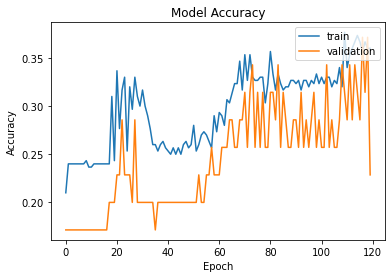

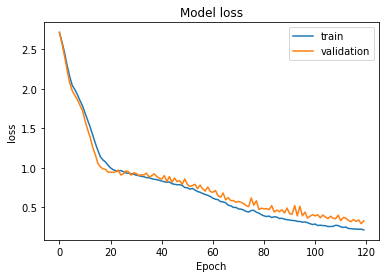

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()